1. Implement PSO algorithm in Python, test it on Himmelblau's function (cf. Wikipedia), plot the results. 
2. Implement a hybrid PSO-kmeans clustering algorithm. Compare it with kmeans++ implementation from sklearn on the Cloud dataset
3. Implement a hybrid of PSO with EM algorithm used to fit gaussian mixture models. Compare it with EM algorithm itself, EM algorithm with restarts, and other more advanced algorithms. "

discription https://docs.google.com/spreadsheets/d/1xlPGoqAjMdqyCR9UN_K2AYXppgHWt9d6NNV1uhtQ3xc/edit#gid=0

Himmelblau's function https://en.wikipedia.org/wiki/Himmelblau%27s_function

Particle Swarm Optimization https://en.wikipedia.org/wiki/Particle_swarm_optimization

In [7]:
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
# import numpy as np

**Himmelblau's function**

In [8]:
def Himmelbau(x) -> np.float16:
  """
  Himmelblau's function is a multi-modal function,
  used to test the performance

  f(x, y) = (x^2 + y -11) + (x + y^2 - 7)
  z - 2 demensional np.array 
  """  
  return (x[:, 0]**2. + x[:, 1] - 11.)**2. + (x[:, 0] + x[:, 1]**2. - 7.)**2.

_x =  np.asarray([[-3, 2], [2,4]])
Himmelbau(_x)

# np.absolute(_x)

array([ 36., 130.])

**Particle Swarm Optimization Algorithm**

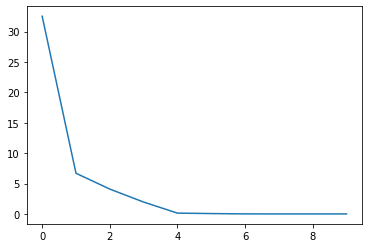

In [9]:
def PSO(
    f,   
    S,
    phi_p=.6,
    phi_g=.8,
    b=[-5, 8],
    w=.5,
    # range_y = [-10, 10]
    n = 10_000
):
  """
  A basic variant of the PSO algorithm/ Minimum

  f - function,
  phi_p, phi_g - parametrs of personal best and swarm best respectively
  S - swarm (population)
  w - speed parametr

  x - current position
  v - points velocity
  p - personal best position
  g - swarm best position
  """ 
  # initialize 
  x_0 = np.random.uniform(b[0], b[1], S)
  x_1 = np.random.uniform(b[0], b[1], S)
  x = np.dstack((x_0, x_1))[0]

  p = x
  mask = f(x).min()
  g = x[mask == Himmelbau(x)] # if more than one point

  v_0 = np.random.uniform(-1*np.absolute(b[0]-b[1]), np.absolute(b[0]-b[1]), S)
  v_1 = np.random.uniform(-1*np.absolute(b[0]-b[1]), np.absolute(b[0]-b[1]), S)
  v = np.dstack((v_0, v_1))[0]


  _n = 0  # need terminate condition
  paricle_list = []
  result = []
  while _n < n:
    _n += 1
    rp_0, rg_0 = np.random.uniform(0, 1, 2)
    rp_1, rg_1 = np.random.uniform(0, 1, 2)
    r_p = np.dstack((rp_0, rp_1))[0]
    r_g = np.dstack((rp_0, rp_1))[0]

    v = w*v + phi_p * r_p * (p - x) +  phi_g * r_p * (g - x)
    x = x + v

    #  ошибка, если несколько оптимальных значений
    tmp = np.minimum(f(x), f(p))
    mask = np.float16(f(x) == tmp).reshape(S, -1)
    p = x*mask + p*(mask - 1)*(-1)
    paricle_list.append(p)

    mask = f(p).min()
    ext_p = p[f(p) == mask][:1] #  ошибка, если несколько мин значений
    g = g if f(g) < f(ext_p) else ext_p


    if _n % (n//10) == 0:
      result.append(f(g)[0])

  return g, f(g)[0], result, p, paricle_list

g_r, f_g, dat, r_p, paricle_list = PSO(Himmelbau, 10, n=30, phi_p=1., phi_g=2.,)


plt.plot(dat)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0, 'z')

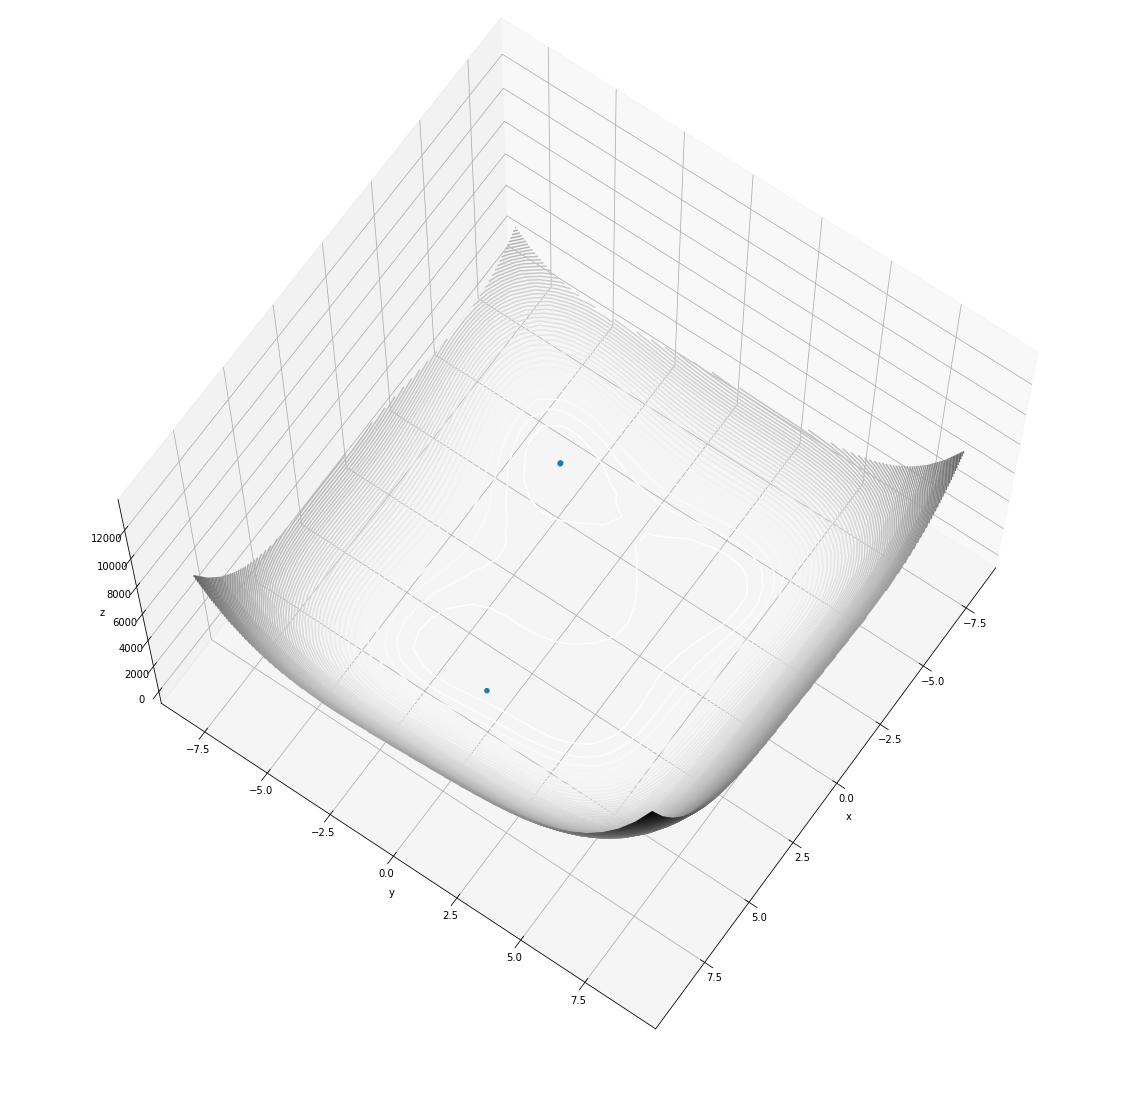

In [10]:
def f(x, y):
    return (x**2. + y - 11.)**2. + (x + y**2. - 7.)**2.

x = np.linspace(-8, 9, 30)
y = np.linspace(-8, 9, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 150, cmap='binary')
ax.scatter(r_p[:, 0], r_p[:, 1], Himmelbau(r_p), linewidth=0.95)
ax.view_init(70, 35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

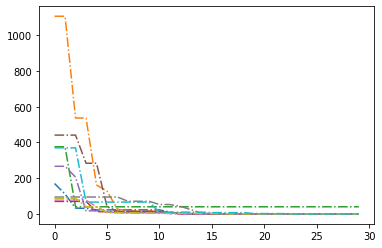

In [11]:
for i in range(len(paricle_list[0])):
  tmp = []
  for j in range(len(paricle_list)):
    # print(paricle_list[j][i])
    f = lambda x:  (x[0]**2. + x[1] - 11.)**2. + (x[0] + x[1]**2. - 7.)**2.
    tmp.append( f( paricle_list[j][i]))
  plt.plot(range(len(paricle_list)), tmp,label = "{}line".format(i), linestyle="-.")

# plt.legend()
plt.show()

In [12]:
len(paricle_list)

30

**PSO-kmeans** clustering

https://github.com/NiloofarShahbaz/PSOClustering/blob/master/pso_clustering.py

In [14]:
# from scipy.stats import multivariate_normal as mvn

# def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

#     n, p = xs.shape
#     k = len(pis)

#     ll_old = 0
#     for i in range(max_iter):
#         exp_A = []
#         exp_B = []
#         ll_new = 0

#         # E-step
#         ws = np.zeros((k, n))
#         for j in range(len(mus)):
#             for i in range(n):
#                 ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
#         ws /= ws.sum(0)

#         # M-step
#         pis = np.zeros(k)
#         for j in range(len(mus)):
#             for i in range(n):
#                 pis[j] += ws[j, i]
#         pis /= n

#         mus = np.zeros((k, p))
#         for j in range(k):
#             for i in range(n):
#                 mus[j] += ws[j, i] * xs[i]
#             mus[j] /= ws[j, :].sum()

#         sigmas = np.zeros((k, p, p))
#         for j in range(k):
#             for i in range(n):
#                 ys = np.reshape(xs[i]- mus[j], (2,1))
#                 sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
#             sigmas[j] /= ws[j,:].sum()

#         # update complete log likelihoood
#         ll_new = 0.0
#         for i in range(n):
#             s = 0
#             for j in range(k):
#                 s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
#             ll_new += np.log(s)

#         if np.abs(ll_new - ll_old) < tol:
#             break
#         ll_old = ll_new

#     return ll_new, pis, mus, sigmas

In [15]:
np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

# initial guesses for parameters
pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)

In [16]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)

CPU times: user 14.7 s, sys: 988 ms, total: 15.7 s
Wall time: 14.2 s


In [188]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


clusters_best = []

class Particle:
    def __init__(self, n_clusters, data, use_kmeans=True, w=0.72, c1=1.49, c2=1.49):
        self.n_clusters = n_clusters
        if use_kmeans:
            # k_means = KMeans(n_clusters=self.n_clusters, init='random')
            k_means = KMeans(n_clusters=self.n_clusters)
            k_means.fit(data)
            
            self.centroids_pos = k_means.cluster_centers_
        else:
            self.centroids_pos = data[np.random.choice(list(range(len(data))), self.n_clusters)]

        # each cluster has a centroid which is the point that represents that cluster
        # assign k random data to k centroids
        self.pb_val = np.inf
        # personal best position for all the centroids so far
        self.pb_pos = self.centroids_pos.copy()
        self.velocity = np.zeros_like(self.centroids_pos)
        # best data clustering so far
        self.pb_clustering = None
        # pso params
        self.w = w
        self.c1 = c1
        self.c2 = c2

    def update_pb(self, data: np.ndarray):
        """
        Updates personal best score based on the fitness function mentioned in the paper (Equation(4))
        :return:
        """
        # finding out which data points belongs to which cluster
        # for that we have to find the distance between the data points and the centroids.
        distances = self._get_distances(data=data)
        # the minimum distance between a data point and a centroid indicates that, the point belongs to that cluster.
        clusters = np.argmin(distances, axis=0)  # shape: (len(data),)
        clusters_ids = np.unique(clusters)

        # This is for when the algorithm generates less than n clusters
        # So we find the cluster id that is missed and generate the centroid position with a random data point
        while len(clusters_ids) != self.n_clusters:
            deleted_clusters = np.where(np.isin(np.arange(self.n_clusters), clusters_ids) == False)[0]
            self.centroids_pos[deleted_clusters] = data[np.random.choice(list(range(len(data))), len(deleted_clusters))]
            distances = self._get_distances(data=data)
            clusters = np.argmin(distances, axis=0)
            clusters_ids = np.unique(clusters)

        new_val = self._fitness_function(clusters=clusters, distances=distances)
        if new_val < self.pb_val:
            self.pb_val = new_val
            self.pb_pos = self.centroids_pos.copy()
            self.pb_clustering = clusters.copy()

    def update_velocity(self, gb_pos: np.ndarray):
        """
        Updates new velocity based on the current velocity, personal best position so far, and the swarm (global) best
        position so far.
        :param gb_pos: vector of best centroid positions among all particles so far
        :return:
        """
        self.velocity = self.w * self.velocity + \
                        self.c1 * np.random.random() * (self.pb_pos - self.centroids_pos) + \
                        self.c2 * np.random.random() * (gb_pos - self.centroids_pos)

    def move_centroids(self, gb_pos):
        self.update_velocity(gb_pos=gb_pos)
        new_pos = self.centroids_pos + self.velocity
        self.centroids_pos = new_pos.copy()

    def _get_distances(self, data: np.ndarray) -> np.ndarray:
        """
        Calculates the Euclidean distance between data and centroids
        :param data:
        :return: distances: a numpy array of distances (len(centroids) x len(data))
        """
        distances = []
        for centroid in self.centroids_pos:
            # calculate euclidean distance --> square root of sum of absolute squares
            # d = np.linalg.norm(data - centroid)
            d = np.linalg.norm(data - centroid, axis=1)
            # print('data', data.shape)
            # print('centroid', centroid.shape)
            # print('d', d.shape)
            

            distances.append(d)
        distances = np.array(distances)
        return distances

    def _fitness_function(self, clusters: np.ndarray, distances: np.ndarray) -> float:
        """
        Calculates the fitness function ( Equation 4)
        i is the index of particle
        j is the index of clusters in the particle i
        p is the vector of the input data indices belonging the cluster[ij]
        z[p] is the vector of the input data belonging the cluster[ij]
        d is a vector of distances between z(p) and centroid j
        :param clusters:
        :param distances:
        :return: J:
        """
        J = 0.0
        for i in range(self.n_clusters):
            p = np.where(clusters == i)[0]
            if len(p):
                d = sum(distances[i][p])
                d /= len(p)
                J += d
        J /= self.n_clusters
        return J


class PSOClusteringSwarm:
    def __init__(self, n_clusters: int, n_particles: int, data: np.ndarray, hybrid=True, w=0.72, c1=1.49, c2=1.49):
        """
        Initializes the swarm.
        :param n_clusters: number of clusters
        :param n_particles: number of particles
        :param data: ( number_of_points x dimensions)
        :param hybrid: bool : whether or not use kmeans as seeding
        :param w:
        :param c1:
        :param c2:
        """
        self.n_clusters = n_clusters
        self.n_particles = n_particles
        self.data = data

        self.particles = []
        # for storing global best
        self.gb_pos = None
        self.gb_val = np.inf
        # global best data clustering so far
        # for each data point will contain the cluster number
        self.gb_clustering = None

        self._generate_particles(hybrid, w, c1, c2)

    def _print_initial(self, iteration, plot):
        print('*** Initialing swarm with', self.n_particles, 'PARTICLES, ', self.n_clusters, 'CLUSTERS with', iteration,
              'MAX ITERATIONS and with PLOT =', plot, '***')
        print('Data=', self.data.shape[0], 'points in', self.data.shape[1], 'dimensions')

    def _generate_particles(self, hybrid: bool, w: float, c1: float, c2: float):
        """
        Generates particles with k clusters and t-dimensional points
        :return:
        """
        for i in range(self.n_particles):
            particle = Particle(n_clusters=self.n_clusters, data=self.data, use_kmeans=hybrid, w=w, c1=c1, c2=c2)
            self.particles.append(particle)

    def update_gb(self, particle):
        if particle.pb_val < self.gb_val:
            self.gb_val = particle.pb_val
            self.gb_pos = particle.pb_pos.copy()
            self.gb_clustering = particle.pb_clustering.copy()

    def start(self, iteration=1000, plot=False) -> Tuple[np.ndarray, float]:
        """
        :param plot: = True will plot the global best data clusters
        :param iteration: number of max iteration
        :return: (best cluster, best fitness value)
        """
        self._print_initial(iteration, plot)
        progress = []
        particles_obj = []
        # Iterate until the max iteration
        for i in range(iteration):
            if i % 200 == 0:
                clusters = self.gb_clustering
                print('iteration', i, 'GB =', self.gb_val)
                print('best clusters so far = ', clusters)
                # print("min", min([ p._get_distances(self.data).min(axis=0).sum() for p in self.particles]))
                # raise Exception("Sorry, no numbers below zero")
                # print("particles", sum(sum([ p._get_distances(self.data) for p in self.particles])))
                
                # clusters_best.append(self.particles[0].centroids_pos)

                if plot:
                    centroids = self.gb_pos
                    if clusters is not None:
                        plt.scatter(self.data[:, 0], self.data[:, 1], c=clusters, cmap='viridis')
                        plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
                        plt.show()
                    else:  # if there is no clusters yet ( iteration = 0 ) plot the data with no clusters
                        plt.scatter(self.data[:, 0], self.data[:, 1])
                        plt.show()

            for particle in self.particles:
                particle.update_pb(data=self.data)
                self.update_gb(particle=particle)

            for particle in self.particles:
                particle.move_centroids(gb_pos=self.gb_pos)
            progress.append([self.gb_pos, self.gb_clustering, self.gb_val])
            
            tmp = []
            for particle in self.particles:
                tmp.append(particle.pb_val)
            particles_obj.append(tmp)

        print('Finished!')
        return self.gb_clustering, self.gb_val, progress, self.gb_pos


In [189]:
plot = False
data_points = pd.read_csv('cloud.csv', sep=',', header=None)#, skiprows=[0])
# clusters = data_points[11].values
# data_points = data_points.drop([11], axis=1)

# if you want to plot you can only show 2 points! so will use 2 points of data
if plot:
    data_points = data_points[[0, 1]]
# convert to numpy 2d array
data_points = data_points.values
# pso = PSOClusteringSwarm(n_clusters=len(set(clusters)), n_particles=10, data=data_points, hybrid=True)
pso = PSOClusteringSwarm(n_clusters=10, n_particles=10, data=data_points, hybrid=True)
pso_centroid = pso.start(iteration=1000, plot=plot)[-1]

print(' ')

# For showing the actual clusters
# mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# clusters = np.array([mapping[x] for x in clusters])
# print('Actual classes = ', clusters)

*** Initialing swarm with 10 PARTICLES,  10 CLUSTERS with 1000 MAX ITERATIONS and with PLOT = False ***
Data= 2048 points in 10 dimensions
iteration 0 GB = inf
best clusters so far =  None
iteration 200 GB = 95.60301810047815
best clusters so far =  [1 3 0 ... 6 6 6]
iteration 400 GB = 85.21874494608915
best clusters so far =  [1 1 3 ... 9 9 9]
iteration 600 GB = 81.4011037333803
best clusters so far =  [1 1 6 ... 9 9 9]
iteration 800 GB = 79.6308438577019
best clusters so far =  [1 1 6 ... 7 7 7]
Finished!
 


In [190]:
# i = 0

# a1 = clusters_best[-1][i]
# kmeans.cluster_centers_[i]

# np.linalg.norm(kmeans.cluster_centers_[i] - clusters_best[-1][i], axis=1)

In [191]:
# a2 = kmeans.cluster_centers_

In [192]:
# np.linalg.norm(a1 - a2)
# a1

In [193]:
# a2-a1

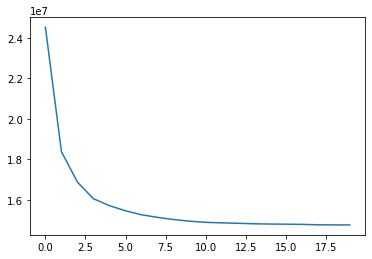

In [215]:
def train_kmeans(X):
    kmeans = KMeans(n_clusters=10, verbose=2, n_init=1, max_iter=800) #<-- init=1, verbose=2
    kmeans.fit(X)
    return kmeans

#HELPER FUNCTION
#Takes the returned and printed output of a function and returns it as variables
#In this case, the returned output is the model and printed is the verbose intertia at each iteration

def redirect_wrapper(f, inp):
    old_stdout = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout

    returned = f(inp)                #<- Call function
    printed = new_stdout.getvalue()  #<- store printed output

    sys.stdout = old_stdout
    return returned, printed


returned, printed = redirect_wrapper(train_kmeans, data_points)

#Extract inertia values
inertia = [float(i[i.find('inertia')+len('inertia')+1:]) for i in printed.split('\n')[1:-2]]

#Plot!
inertia = [i for i in inertia]
plt.plot(inertia)

data_points = pd.read_csv('cloud.csv', sep=',', header=None)


kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)
kmeanspp_centroid = kmeans.cluster_centers_

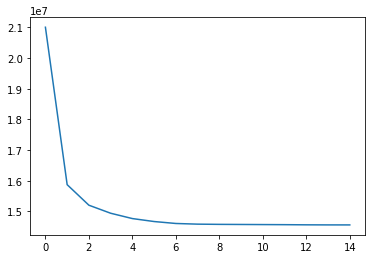

In [216]:
def train_kmeans(X):
    kmeans = KMeans(n_clusters=10, verbose=2, n_init=1, max_iter=800) #<-- init=1, verbose=2
    kmeans.fit(X)
    return kmeans

#HELPER FUNCTION
#Takes the returned and printed output of a function and returns it as variables
#In this case, the returned output is the model and printed is the verbose intertia at each iteration

def redirect_wrapper(f, inp):
    old_stdout = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout

    returned = f(inp)                #<- Call function
    printed = new_stdout.getvalue()  #<- store printed output

    sys.stdout = old_stdout
    return returned, printed


returned, printed = redirect_wrapper(train_kmeans, data_points)

#Extract inertia values
inertia = [float(i[i.find('inertia')+len('inertia')+1:]) for i in printed.split('\n')[1:-2]]

#Plot!
inertia = [i for i in inertia]
plt.plot(inertia)

data_points = pd.read_csv('cloud.csv', sep=',', header=None)

kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(data_points)
kmeans.cluster_centers_ = pso_centroid
kmeanspp_centroid = kmeans.cluster_centers_

In [199]:
zpso_centroid.shape

(10, 10)

In [201]:
kmeanspp_centroid.shape

(10, 10)

In [206]:
# kmeans.cluster_centers_ = pso_centroid
kmeans.inertia_

14736631.22052361

In [145]:
# !wget https://github.com/NiloofarShahbaz/PSOClustering/raw/master/iris.txt
# data_points

--2022-07-26 11:57:16--  https://github.com/NiloofarShahbaz/PSOClustering/raw/master/iris.txt
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NiloofarShahbaz/PSOClustering/master/iris.txt [following]
--2022-07-26 11:57:17--  https://raw.githubusercontent.com/NiloofarShahbaz/PSOClustering/master/iris.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4550 (4.4K) [text/plain]
Saving to: ‘iris.txt’

iris.txt            100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-07-26 11:57:17 (23.8 MB/s) - ‘iris.txt’ saved [4550/4550]



In [197]:
# data_points = pd.read_csv('cloud.csv', sep=',', header=None)
# kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)


In [39]:
import sys
import io

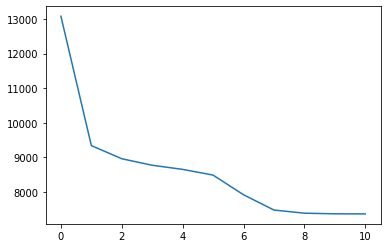

In [40]:
def train_kmeans(X):
    kmeans = KMeans(n_clusters=10, verbose=2, n_init=1, max_iter=800) #<-- init=1, verbose=2
    kmeans.fit(X)
    return kmeans

#HELPER FUNCTION
#Takes the returned and printed output of a function and returns it as variables
#In this case, the returned output is the model and printed is the verbose intertia at each iteration

def redirect_wrapper(f, inp):
    old_stdout = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout

    returned = f(inp)                #<- Call function
    printed = new_stdout.getvalue()  #<- store printed output

    sys.stdout = old_stdout
    return returned, printed


returned, printed = redirect_wrapper(train_kmeans, data_points)

#Extract inertia values
inertia = [float(i[i.find('inertia')+len('inertia')+1:]) for i in printed.split('\n')[1:-2]]

#Plot!
inertia = [i / len(data_points) for i in inertia]
plt.plot(inertia)
kmeans.cluster_centers_

In [41]:
# kmeans.inertia_
kmeans.cluster_centers_

array([[ 7.87804878e+00,  1.98219512e+02,  7.70081976e+01,
         1.17063415e-01,  1.53536285e+03,  2.11170732e-02,
         4.10531220e+00,  1.63609756e+02,  2.41829268e+02,
         2.05451322e+02],
       [ 1.27561173e+01,  7.74582285e+01,  3.54598994e+01,
         4.39876816e+00,  5.02065726e+01,  2.10748155e-01,
         2.26396718e+00, -1.63843017e+01,  2.84287924e+01,
         8.44406214e+00],
       [ 7.56250000e+00,  1.52931818e+02,  4.89160813e+01,
         6.67835227e-02,  5.68339835e+02,  4.09096591e-02,
         3.62019034e+00,  1.70698864e+02,  2.41170455e+02,
         2.16960255e+02],
       [ 3.23758865e+00,  4.84787234e+01,  8.99000284e+00,
         1.31528369e-02,  5.29724181e+01,  3.35847872e-01,
         1.80937340e+00,  2.25464539e+02,  2.48099291e+02,
         2.44042405e+02],
       [ 8.05660377e+00,  1.80424528e+02,  6.67019160e+01,
         9.71632075e-02,  1.10938886e+03,  2.64169811e-02,
         3.95104623e+00,  1.65113208e+02,  2.40424528e+02,
         2.

In [19]:
# data_points = pd.read_csv('iris.txt', sep=',', header=None)
# data_points[4].head()

In [2]:
# plot = False
# data_points = pd.read_csv('iris.txt', sep=',', header=None)
# clusters = data_points[4].values
# data_points = data_points.drop([4], axis=1)
# # if you want to plot you can only show 2 points! so will use 2 points of data
# if plot:
#     data_points = data_points[[0, 1]]
# # convert to numpy 2d array
# data_points = data_points.values
# pso = PSOClusteringSwarm(n_clusters=3, n_particles=10, data=data_points, hybrid=True)
# _, _, result = pso.start(iteration=1000, plot=plot)

# # For showing the actual clusters
# mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# clusters = np.array([mapping[x] for x in clusters])
# print('Actual classes = ', clusters)

In [1]:
# l = []
# for i in result:
#   l.append(i[2])

# l

In [163]:
plot = False
data_points = pd.read_csv('iris.txt', sep=',', header=None)
clusters = data_points[4].values
data_points = data_points.drop([4], axis=1)
# if you want to plot you can only show 2 points! so will use 2 points of data
if plot:
    data_points = data_points[[0, 1]]
# convert to numpy 2d array
data_points = data_points.values
pso = PSOClusteringSwarm(n_clusters=3, n_particles=10, data=data_points, hybrid=True)
pso.start(iteration=1000, plot=plot)

# For showing the actual clusters
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
clusters = np.array([mapping[x] for x in clusters])
print('Actual classes = ', clusters)

*** Initialing swarm with 10 PARTICLES,  3 CLUSTERS with 1000 MAX ITERATIONS and with PLOT = False ***
Data= 150 points in 4 dimensions
iteration 0 GB = inf
best clusters so far =  None
min 97.32592423430012
iteration 200 GB = 0.6449641797479488
best clusters so far =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
min 97.03117431572606
iteration 400 GB = 0.6449064300293786
best clusters so far =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
min 97.02420637448337
iteration 60

In [156]:

# !wget https://github.com/milaan9/Clustering-Datasets/raw/master/01.%20UCI/wineqr.csv
# data_points

In [169]:
data_points = pd.read_csv('cloud.csv', sep=',', header=None)
# clusters = data_points[4].values
# data_points = data_points.drop([4], axis=1)
# nclst = len(set(clusters))
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_points)

# print(nclst)

kmeans.inertia_

14736631.22052361

In [47]:
plot = False
data_points = pd.read_csv('cloud.csv', sep=',', header=None)#, skiprows=[0])
# clusters = data_points[11].values
# data_points = data_points.drop([11], axis=1)

# if you want to plot you can only show 2 points! so will use 2 points of data
if plot:
    data_points = data_points[[0, 1]]
# convert to numpy 2d array
data_points = data_points.values
# pso = PSOClusteringSwarm(n_clusters=len(set(clusters)), n_particles=10, data=data_points, hybrid=True)
pso = PSOClusteringSwarm(n_clusters=10, n_particles=10, data=data_points, hybrid=True)
pso.start(iteration=1000, plot=plot)

print(' ')

# For showing the actual clusters
# mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# clusters = np.array([mapping[x] for x in clusters])
# print('Actual classes = ', clusters)

*** Initialing swarm with 10 PARTICLES,  10 CLUSTERS with 1000 MAX ITERATIONS and with PLOT = False ***
Data= 2048 points in 10 dimensions
iteration 0 GB = inf
best clusters so far =  None
particles [<__main__.Particle object at 0x7f125e157d10>, <__main__.Particle object at 0x7f125e157bd0>, <__main__.Particle object at 0x7f125e157690>, <__main__.Particle object at 0x7f125e181610>, <__main__.Particle object at 0x7f125e101610>, <__main__.Particle object at 0x7f125e1576d0>, <__main__.Particle object at 0x7f125e157510>, <__main__.Particle object at 0x7f125e1579d0>, <__main__.Particle object at 0x7f125e0cdd10>, <__main__.Particle object at 0x7f125e157a10>]
iteration 200 GB = 92.00112559680262
best clusters so far =  [1 1 3 ... 7 7 7]
particles [<__main__.Particle object at 0x7f125e157d10>, <__main__.Particle object at 0x7f125e157bd0>, <__main__.Particle object at 0x7f125e157690>, <__main__.Particle object at 0x7f125e181610>, <__main__.Particle object at 0x7f125e101610>, <__main__.Particle o

In [43]:
clusters_best

[]

In [217]:
# plot = False
# data_points = pd.read_csv('wineqr.csv', sep=',', header=None, skiprows=[0])
# clusters = data_points[11].values
# data_points = data_points.drop([11], axis=1)
# # if you want to plot you can only show 2 points! so will use 2 points of data
# if plot:
#     data_points = data_points[[0, 1]]
# # convert to numpy 2d array
# data_points = data_points.values
# pso = PSOClusteringSwarm(n_clusters=len(set(clusters)), n_particles=10, data=data_points, hybrid=True)
# pso.start(iteration=1000, plot=plot)

# # For showing the actual clusters
# # mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# # clusters = np.array([mapping[x] for x in clusters])
# print('Actual classes = ', clusters)

In [ ]:
data_points = pd.read_csv('wineqr.csv', sep=',', header=None, skiprows=[0])
data_points[11].values

array([5, 5, 5, ..., 6, 5, 6])